In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('dataset.csv')
df

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [4]:
df.shape

(15000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


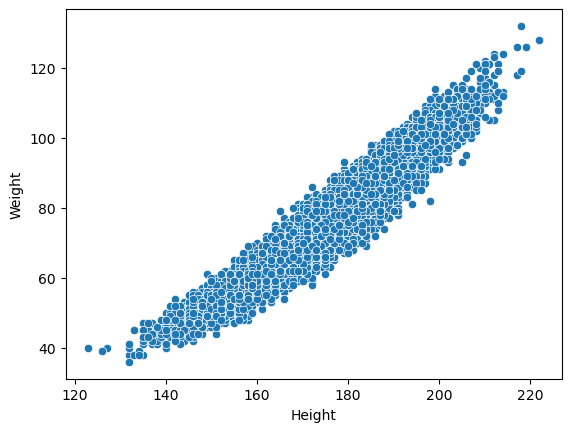

In [7]:
sb.scatterplot(x=df['Height'], y=df['Weight']) 
plt.show()

In [8]:
df.columns.tolist()

['User_ID',
 'Calories',
 'Gender',
 'Age',
 'Height',
 'Weight',
 'Duration',
 'Heart_Rate',
 'Body_Temp']

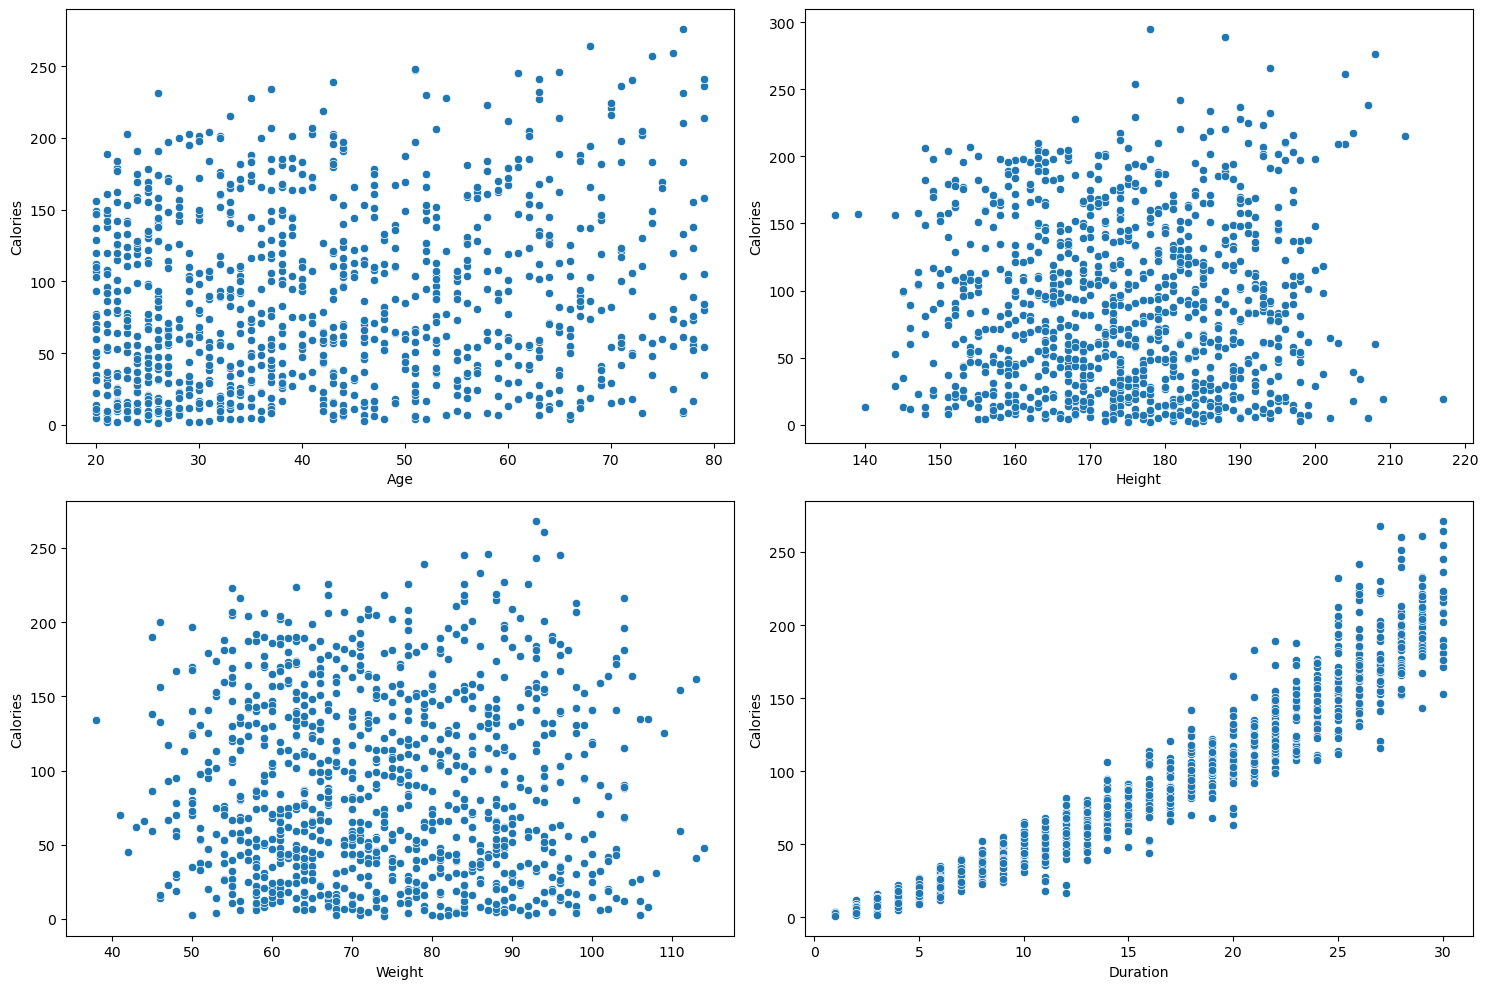

In [9]:
features = ['Age', 'Height', 'Weight', 'Duration'] 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 2, i + 1) 
    x = df.sample(1000) 
    sb.scatterplot(x=x[col], y=x['Calories']) 
plt.tight_layout() 
plt.show() 

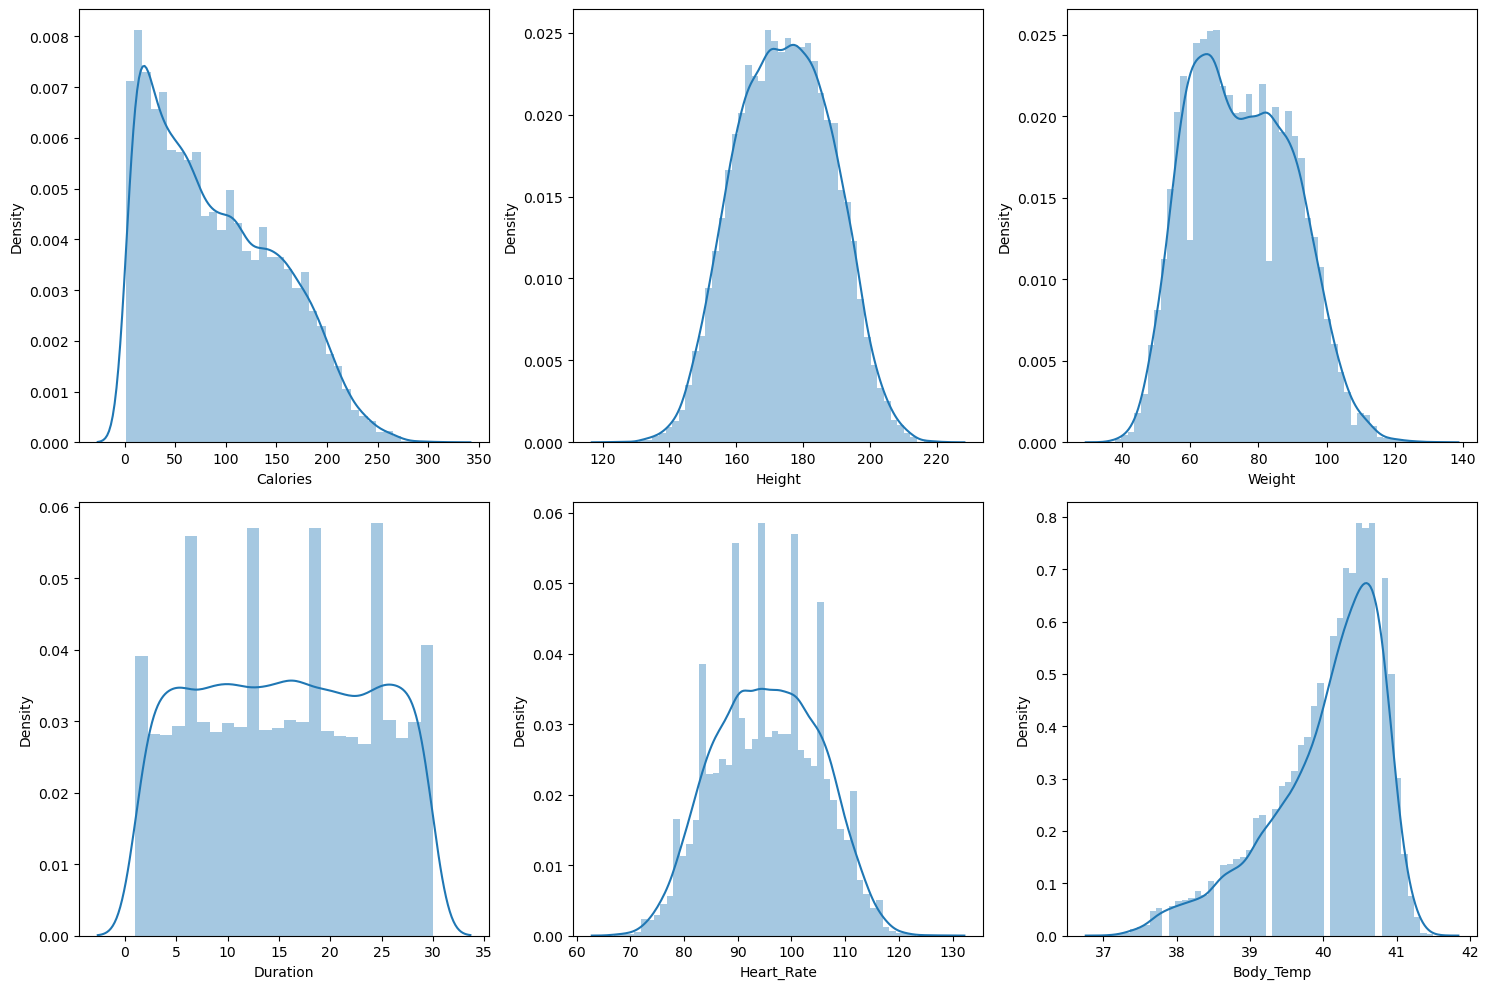

In [10]:
features = df.select_dtypes(include='float').columns 
  
plt.subplots(figsize=(15, 10)) 
for i, col in enumerate(features): 
    plt.subplot(2, 3, i + 1) 
    sb.distplot(df[col]) 
plt.tight_layout() 
plt.show()

In [11]:
df.replace({'male':0, 'female':1}, inplace=True)
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,0,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,1,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,0,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,1,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,1,27,154.0,58.0,10.0,81.0,39.8


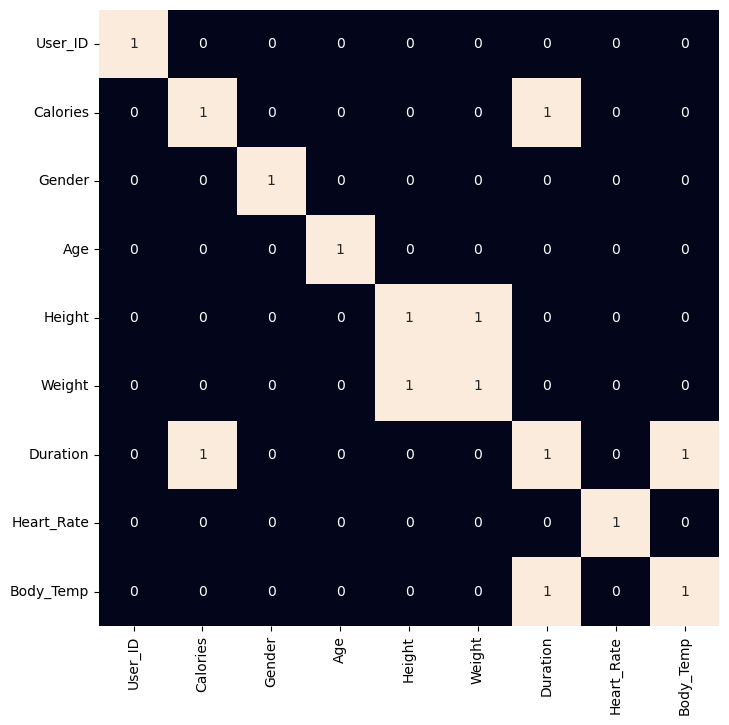

In [12]:
plt.figure(figsize=(8, 8)) 
sb.heatmap(df.corr() > 0.9, 
           annot=True, 
           cbar=False) 
plt.show() 

In [13]:
to_remove = ['Weight', 'Duration'] 
df.drop(to_remove, axis=1, inplace=True) 

In [14]:
features = df.drop(['User_ID', 'Calories'], axis=1) 
target = df['Calories'].values 
  
X_train, X_val,Y_train, Y_val = train_test_split(features, target, 
                                      test_size=0.1, 
                                      random_state=22) 
X_train.shape, X_val.shape 

((13500, 5), (1500, 5))

In [15]:
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val) 

In [16]:
from sklearn.metrics import mean_absolute_error as mae 
models = [LinearRegression(), Lasso(), RandomForestRegressor(), Ridge()] 
  
for i in range(4): 
    models[i].fit(X_train, Y_train) 
  
    print(f'{models[i]} : ') 
  
    train_preds = models[i].predict(X_train) 
    print('Training Error : ', mae(Y_train, train_preds)) 
  
    val_preds = models[i].predict(X_val) 
    print('Validation Error : ', mae(Y_val, val_preds)) 
    print() 

LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.99503336228866

RandomForestRegressor() : 
Training Error :  3.9780731834215164
Validation Error :  10.454061785714286

Ridge() : 
Training Error :  17.893530494767777
Validation Error :  18.00781790803129

